## About the Dataset:
Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/text.csv')
df.head()

Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4

## Data Understanding

In [9]:
df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
# Shape of the data
df.shape

(416809, 2)

In [11]:
df.head()

text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [13]:
df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

## Cleaning Null and Duplicated values

In [14]:
# Null Values
df.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
# Duplicates
df.duplicated().sum()

686

In [16]:
# Duplicated Data
duplicates = df[df.duplicated()]
duplicates

text  label
8397    i told my staff i said you know i feel invigor...      1
15187                                         i feel fine      1
15638   i feel bob loblaw is a handsome professional m...      1
19413   i feel tortured var fb comment action link hre...      3
23711   i also have no particular feeling of patriotis...      2
...                                                   ...    ...
415504  i am a sentimental woman n extremely sensitive...      2
415867  i just screend up your profile and i feel you ...      1
415891                             the death of my father      0
416310                                 i feel so innocent      1
416424      i feel more adventurous willing to take risks      1

[686 rows x 2 columns]

In [17]:
# Drop the duplicates based on text
df = df.drop_duplicates(subset=['text'])

In [18]:
df.duplicated().sum()

0

In [19]:
# Replace the label values with actual values
label = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

df['label'] = df['label'].map(label)

In [20]:
df.head()

text    label
0      i just feel really helpless and heavy hearted     fear
1  ive enjoyed being able to slouch about relax a...  sadness
2  i gave up my internship with the dmrg and am f...     fear
3                         i dont know i feel so lost  sadness
4  i am a kindergarten teacher and i am thoroughl...     fear

## Visualizing the labels

In [21]:
import plotly.express as px

label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
fig = px.bar(label_counts, x='label', y='count', text='count', color='label', title='Count Plot')
#fig.update_layout(width=700, height=300)
fig.show()

In [22]:
fig = px.pie(df, names='label', title='Pie Chart')
fig.update_traces(textinfo = 'percent+label')
fig.update_layout(height=400)
fig.show()

In [23]:
df['label'].unique()

array(['fear', 'sadness', 'love', 'joy', 'surprise', 'anger'],
      dtype=object)

## Cleaning the data

In [24]:
contraction_dict = {
    "ive": "I have",
    "dont": "don't",
    "cant": "can't",
    "wont": "won't",
    "isnt": "isn't",
    "wasnt": "wasn't",
    "hasnt": "hasn't",
    "havent": "haven't",
    "im": "I am",
    "youre": "you are",
    "hes": "he is",
    "shes": "she is",
    "its": "it is",
    "were": "we are",
    "theyre": "they are",
    "ive": "I have",
    "id": "I would",
    "ive": "I have",
    "wouldve": "would have",
    "couldve": "could have",
    "shouldve": "should have"
}


In [ ]:
# Cleaning the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def cleaning(data):
    cleaned_text = data['text'].str.lower()
    cleaned_text = cleaned_text.apply(lambda text: ' '.join(contraction_dict.get(word, word) for word in word_tokenize(text))) # Remove Contractions
    cleaned_text = cleaned_text.apply(lambda text: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(text)])) # Lemmatizing 
    cleaned_text = cleaned_text.apply(lambda text: re.sub(r'http?\S+', ' ', text)) # Remove URL 
    cleaned_text = cleaned_text.apply(lambda text: re.sub(r'[^a-zA-Z\s]', ' ', text)) # Remove non-alphbetic Char
    cleaned_text = cleaned_text.apply(lambda text: re.sub(r'\d+', ' ', text)) # Remove digits
    cleaned_text = cleaned_text.apply(lambda text: re.sub(r'\s+', ' ', text)) # Remove Spaces
    cleaned_text = cleaned_text.apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stop_words])) # Remove Stoppwords
    
    return cleaned_text

df['text'] = cleaning(df)

In [26]:
df.head(10)

text     label
0                 feel really helpless heavy hearted      fear
1  I enjoy able slouch relax unwind frankly need ...   sadness
2               give internship dmrg feel distraught      fear
3                                   n know feel lose   sadness
4  kindergarten teacher thoroughly weary job take...      fear
5                        begin feel quite dishearten   sadness
6  would think whomever would lucky enough stay s...      love
7  fear win ever feel delicious excitement christ...       joy
8                 I forever take time lie feel weird  surprise
9             still lose weight without feel deprive   sadness

## Wordcloud

In [27]:
# Creating separate dataframes

df_fear = df[df['label']=='fear']
df_sadness = df[df['label']=='sadness']
df_love = df[df['label']=='love']
df_joy = df[df['label']=='joy']
df_surprise = df[df['label']=='surprise']
df_anger = df[df['label']=='anger']

# Combine text from the Dataframes
combined_fear_text = ' '.join(df_fear['text'])
combined_sadness_text = ' '.join(df_sadness['text'])
combined_love_text = ' '.join(df_love['text'])
combined_joy_text = ' '.join(df_love['text'])
combined_surprise_text = ' '.join(df_surprise['text'])
combined_anger_text = ' '.join(df_anger['text'])

# Creating wordcloud
from wordcloud import WordCloud

fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
surpise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)

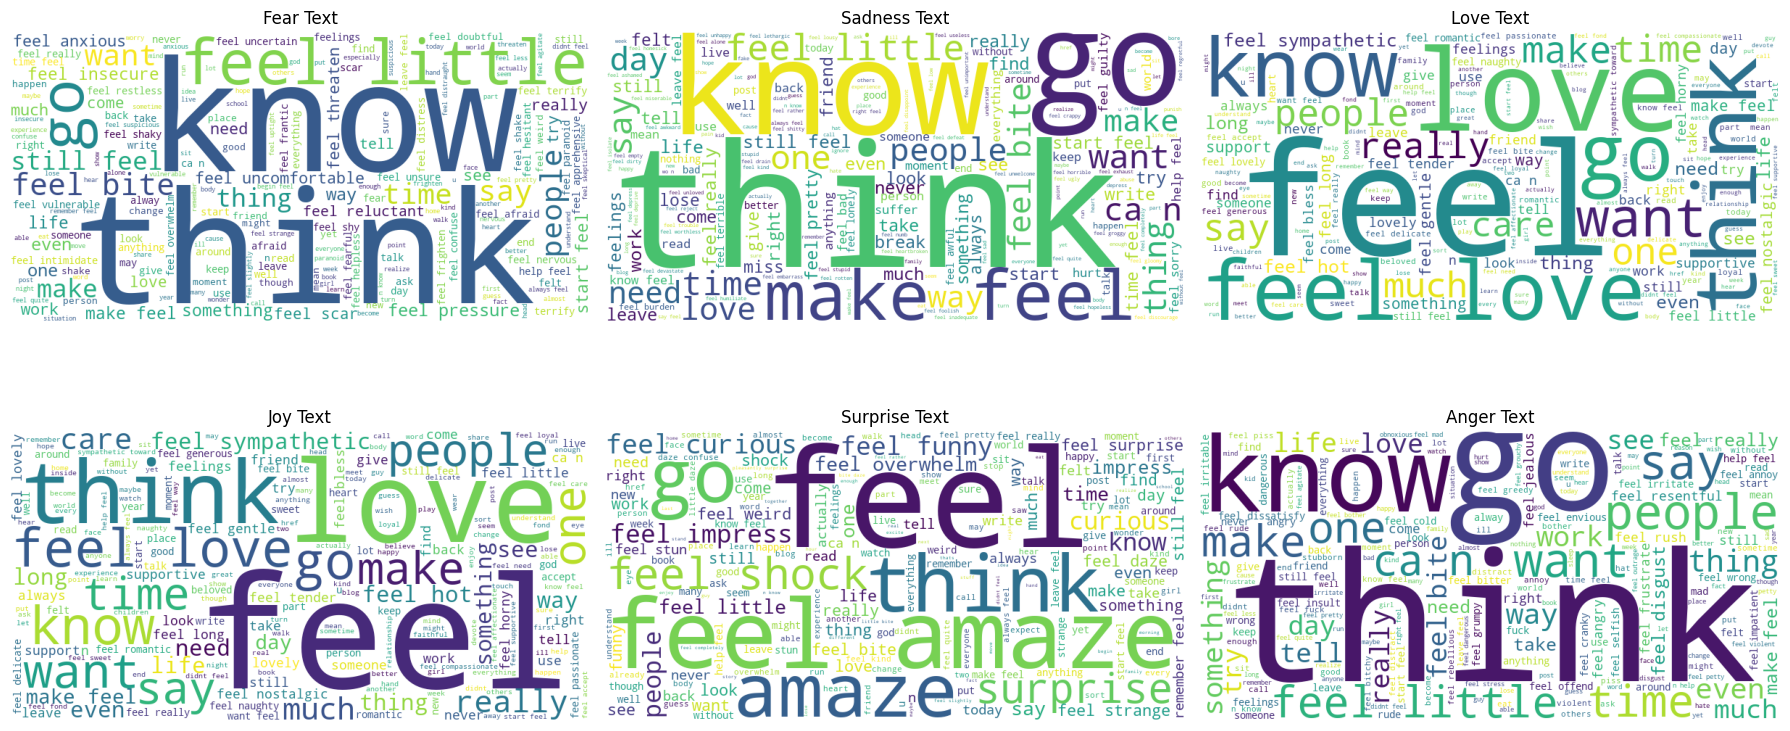

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))

plt.subplot(2,3,1)
plt.imshow(fear_wordcloud)
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(sadness_wordcloud)
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(love_wordcloud)
plt.title('Love Text')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(joy_wordcloud)
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(surpise_wordcloud)
plt.title('Surprise Text')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(anger_wordcloud)
plt.title('Anger Text')
plt.axis('off')

plt.tight_layout()
plt.show()

## Getting top 20 words

In [29]:
# Function for top 20 words
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

labels = df['label'].unique()

def display_top_words(text):
    data = df[df['label']==text]['text']
    words = [word.lower() for sentence in data for word in word_tokenize(sentence)]
    counter = Counter(words)
    top_words = counter.most_common(20)
    top_words_df = pd.DataFrame(top_words, columns=['words', 'count'])
    return top_words_df

for text in labels:
    print('Label is :', text)
    top_words_df = display_top_words(text)
    print(top_words_df)

Label is : fear
     words  count
0     feel  45264
1        i   8849
2     like   5703
3       go   3623
4      get   3405
5     know   3394
6   little   3255
7        n   3085
8     make   2993
9    think   2839
10    time   2723
11  really   2556
12   would   2345
13    want   2317
14    bite   2294
15   still   2223
16  people   1990
17   start   1972
18    scar   1832
19     say   1774
Label is : sadness
     words   count
0     feel  124464
1        i   23470
2     like   21967
3        n    9349
4      get    9046
5     know    8400
6     make    8282
7       go    8070
8     time    7475
9   really    7413
10   think    6949
11   would    6106
12    want    6059
13  little    5602
14    even    4762
15     say    4761
16  people    4727
17   still    4647
18     one    4220
19    life    4182
Label is : love
          words  count
0          feel  30430
1          like   7970
2             i   5331
3          love   5293
4          know   2167
5           get   2128
6          

In [30]:
# Since 'n' is appearing a lot in the most frequent words
df['text'] = df['text'].str.replace(r'\bn\b', '', regex=True)

In [31]:
fear_df = display_top_words('fear')
sadness_df = display_top_words('sadness')
love_df = display_top_words('love')
joy_df = display_top_words('joy')
surprise_df = display_top_words('surprise')
anger_df = display_top_words('anger')

## Top 20 words of Fear

In [32]:
fig = px.bar(fear_df, x='words', y='count', color='words', title='Top 20 words of Fear', text='count')
fig.show()




## Top 20 words of Sadness

In [33]:
fig = px.bar(sadness_df, x='words', y='count', color='words', title='Top 20 words of sadness', text='count')
fig.show()

## Top 20 words of Anger

In [34]:
fig = px.bar(anger_df, x='words', y='count', color='words', title='Top 20 words of Anger', text='count')
fig.show()

## Top 20 words of Joy

In [35]:
fig = px.bar(joy_df, x='words', y='count', color='words', title='Top 20 words of Joy', text='count')
fig.show()

## Top 20 words of Love

In [36]:
fig = px.bar(love_df, x='words', y='count', color='words', title='Top 20 words of Love', text='count')
fig.show()

## Top 20 words of Surprise

In [37]:
fig = px.bar(surprise_df, x='words', y='count', color='words', title='Top 20 words of Surprise', text='count')
fig.show()

In [38]:
# Saving the cleaned dataset
df.to_csv('./data/cleaned_data.csv', index=False)

In [39]:
df.isnull().sum()

text     0
label    0
dtype: int64